# Pre-trained Models and Transfer Learning

In [1]:
%matplotlib inline

### Start a CAS session

In [2]:
import swat

sess = swat.CAS(cashost, casport)

### All the pre-trained models are built in the application module

In [3]:
from dlpy.applications import (VGG11, VGG11_bn, VGG13, VGG13_bn, VGG16, VGG16_bn, VGG19, VGG19_bn,
                               LeNet5, LeNet5_bn,
                               ResNet18_Caffe, ResNet18_SAS, ResNet34_Caffe, ResNet34_SAS,
                               ResNet50_Caffe, ResNet50_SAS, ResNet101_Caffe, ResNet101_SAS, 
                               ResNet152_Caffe, ResNet152_SAS,
                               DenseNet_Cifar, wide_resnet)

<h3> The prebuilt models with weights</h3> 

**Note:** The pre-trained weights are separate files which you need to download from: 
https://support.sas.com/documentation/prod-p/vdmml/zip/

You will have to download the weight file from the website and use ftp or scp to upload the *.h5 file onto a server side directory which your cas session have access to.

Currently we have pre-trained weights for **VGG16, VGG19, ResNet50, ResNet101, ResNet152**.

**Note:** there are two ways to use the pre-trained model weights: with or without tops.
<ul>

<li> If include_top=True, the ImageNet weights with all layers (including the final prediction layer) will be loaded. You can use the model for prediction.</li>

<li>If include_top=False, the ImageNet weights (without the final prediction layer) will be loaded. The number of classes must be specified according to your classification task. You can use this model for a transfer learning.</li>
</ul>  

In [4]:
import os

PRE_TRAIN_WEIGHT_LOC = '/path/to/imported_models/'

### VGG16 with top for prediction

In [5]:
model1 = VGG16(
    sess, model_table='VGG16',
    n_classes=1000, n_channels=3, width=224, height=224, scale=1,
    offsets=(103.939, 116.779, 123.68),
    pre_train_weight=True, 
    pre_train_weight_file=os.path.join(PRE_TRAIN_WEIGHT_LOC, 'VGG_ILSVRC_16_layers.caffemodel.h5'),
    include_top=True)

NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg16" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table LABEL_JFOYCR in caslib CASUSER(kesmit).
NOTE: The table LABEL_JFOYCR has been created in caslib CASUSER(kesmit) from binary data uploaded to Cloud Analytic Services.


In [6]:
model1.print_summary()

*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      1728 / 64       |
| conv1_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      36864 / 64      |
| pool1(Pool)      |    (2, 2)     |   2    |    Max     | (112, 112, 64)  |        0 / 0         |
| conv2_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     73728 / 128      |
| conv2_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     147456 / 128     |
| pool2(Pool)      |    (2, 2)     |   2    |    Max     |  (56, 56, 128)  |        0 / 0         |


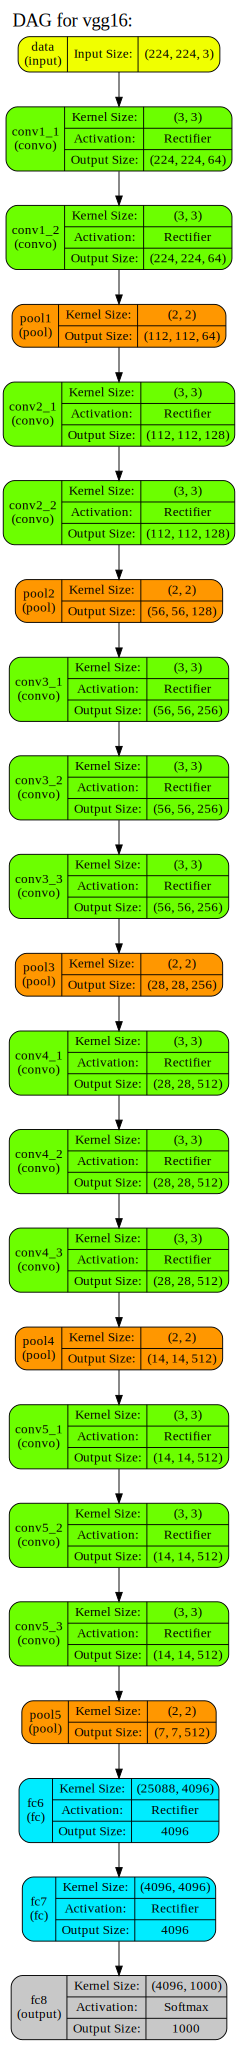

In [7]:
model1.plot_network()

### VGG16 without top for transfer learning

In [8]:
model2 = VGG16(
    sess, model_table='VGG16_notop',
    n_classes=2, n_channels=3, width=224, height=224, scale=1,
    offsets=(103.939, 116.779, 123.68),
    pre_train_weight=True, 
    pre_train_weight_file=os.path.join(PRE_TRAIN_WEIGHT_LOC, 'VGG_ILSVRC_16_layers.caffemodel.h5'),
    include_top=False)

NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg16_notop" according to the model name in the table.


In [9]:
model2.print_summary()

*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      1728 / 64       |
| conv1_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      36864 / 64      |
| pool1(Pool)      |    (2, 2)     |   2    |    Max     | (112, 112, 64)  |        0 / 0         |
| conv2_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     73728 / 128      |
| conv2_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     147456 / 128     |
| pool2(Pool)      |    (2, 2)     |   2    |    Max     |  (56, 56, 128)  |        0 / 0         |


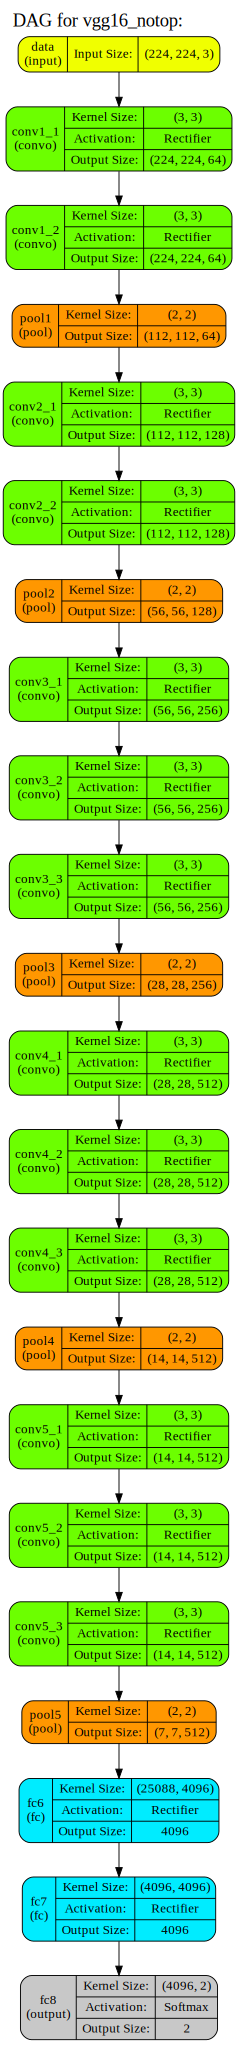

In [10]:
model2.plot_network()

**Note: **
<ul>

<li> The last layers of model 1 and model 2 have different output size.</li>

<li> model 1 can be used for prediction task with input image size as 224 by 224. The predicted labels will be the class labels in the ImageNet problems.</li>

<li> model 2 can be used for a transfer learning with ImageNet weights. More specifically, for 2-class image classification problem, with input image size as 224 by 224.</li>
</ul>  

### Other models with weights can be defined similarily

In [11]:
model3 = VGG19(
    sess, pre_train_weight=True, 
    pre_train_weight_file=os.path.join(PRE_TRAIN_WEIGHT_LOC, 'VGG_ILSVRC_19_layers.caffemodel.h5'),
    include_top=True)
model3.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg19" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table LABEL_4OI8VF in caslib CASUSER(kesmit).
NOTE: The table LABEL_4OI8VF has been created in caslib CASUSER(kesmit) from binary data uploaded to Cloud Analytic Services.
*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      1728 / 64       |
| conv1_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      36864 / 64      |
| pool1(Pool)      |    (2, 2)     |   2    

In [12]:
model4 = ResNet50_Caffe(
    sess, pre_train_weight=True, 
    pre_train_weight_file=os.path.join(PRE_TRAIN_WEIGHT_LOC, 'ResNet-50-model.caffemodel.h5'),
    include_top=True)
model4.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "resnet50_caffe" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table LABEL_DVGHF1 in caslib CASUSER(kesmit).
NOTE: The table LABEL_DVGHF1 has been created in caslib CASUSER(kesmit) from binary data uploaded to Cloud Analytic Services.
*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1(Convo.)    |    (7, 7)     |   2    |  Identity  | (112, 112, 64)  |      9408 / 64       |
| bn_conv1(B.N.)   |     None      |  None  | Rectifier  | (112, 112, 64)  |       0 / 128        |
| pool1(Pool)      |    (3, 3)     

In [13]:
model5 = ResNet101_Caffe(
    sess, pre_train_weight=True, 
    pre_train_weight_file=os.path.join(PRE_TRAIN_WEIGHT_LOC, 'ResNet-101-model.caffemodel.h5'),
    include_top=True)
model5.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "resnet101_caffe" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table LABEL_BYW2KJ in caslib CASUSER(kesmit).
NOTE: The table LABEL_BYW2KJ has been created in caslib CASUSER(kesmit) from binary data uploaded to Cloud Analytic Services.
*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1(Convo.)    |    (7, 7)     |   2    |  Identity  | (112, 112, 64)  |      9408 / 64       |
| bn_conv1(B.N.)   |     None      |  None  | Rectifier  | (112, 112, 64)  |       0 / 128        |
| pool1(Pool)      |    (3, 3)    

In [14]:
model6 = ResNet152_Caffe(
    sess, pre_train_weight=True, 
    pre_train_weight_file=os.path.join(PRE_TRAIN_WEIGHT_LOC, 'ResNet-152-model.caffemodel.h5'),
    include_top=True)
model6.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "resnet152_caffe" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table LABEL_A7RWOE in caslib CASUSER(kesmit).
NOTE: The table LABEL_A7RWOE has been created in caslib CASUSER(kesmit) from binary data uploaded to Cloud Analytic Services.
*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1(Convo.)    |    (7, 7)     |   2    |  Identity  | (112, 112, 64)  |      9408 / 64       |
| bn_conv1(B.N.)   |     None      |  None  | Rectifier  | (112, 112, 64)  |       0 / 128        |
| pool1(Pool)      |    (3, 3)    

For other pre-built models, we do not provide model weights. You need train them from scratch.

In [15]:
model7 = DenseNet_Cifar(sess, model_table='DenseNet', n_classes=10)

NOTE: Input layer added.
NOTE: Convolutional layer added.
NOTE: A block of layers added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Pooling layer added.
NOTE: A block of layers added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Pooling layer added.
NOTE: A block of layers added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Pooling layer added.
NOTE: A block of layers added.
NOTE: Batch Normalization layer added.
NOTE: Pooling layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


In [16]:
model7.print_summary()

*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| Data(Input)      |     None      |  None  |    None    |   (32, 32, 3)   |        0 / 0         |
| Conv1_1(Convo.)  |    (3, 3)     |   1    |  Identity  |  (32, 32, 16)   |       432 / 0        |
| D1B1(B.N.)       |     None      |  None  |    Relu    |  (32, 32, 16)   |        0 / 32        |
| D1C1(Convo.)     |    (3, 3)     |   1    |    Relu    |  (32, 32, 12)   |       1728 / 0       |
| D1Concat1(Conc...|     None      |  None  |  Identity  |  (32, 32, 28)   |        0 / 0         |
| D1B2(B.N.)       |     None      |  None  |    Relu    |  (32, 32, 28)   |        0 / 56        |
| D1C2(Convo.)     |    (3, 3)     |   1    |    Relu    |  (32, 32, 12)   |       3024 / 0       |


In [17]:
sess.terminate()